# Optimización de Gastos de Marketing para Showz

En este proyecto, se analizarán los datos de visitas, pedidos y gastos de marketing de Showz, una empresa de venta de entradas para eventos. El objetivo es optimizar los gastos de marketing a través de un análisis exhaustivo de cómo los clientes utilizan el servicio, cuándo comienzan a comprar, cuánto dinero aportan a la empresa y cuándo los ingresos cubren los costos de adquisición de clientes.

Preparación de Datos
Carga de datos
Comenzamos por cargar los datos desde los archivos CSV.



In [1]:
import pandas as pd

# Cargar los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Mostrar las primeras filas de cada dataframe
print(visits.head())
print(orders.head())
print(costs.head())


    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06

Verificación y limpieza de datos
Es importante verificar que los tipos de datos sean correctos y limpiar los datos si es necesario.

In [2]:
# Verificar tipos de datos
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)

# Convertir fechas a datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Verificar valores nulos
print(visits.isnull().sum())
print(orders.isnull().sum())
print(costs.isnull().sum())


Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object
Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object
source_id      int64
dt            object
costs        float64
dtype: object
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


Análisis de Visitas
Métricas diarias, semanales y mensuales
Aquí calcularemos el número de visitas diarias, semanales y mensuales.

In [3]:
# Extraer la fecha de la columna 'Start Ts'
visits['Date'] = visits['Start Ts'].dt.date

# Visitas diarias
daily_visits = visits.groupby('Date').size()
print(daily_visits)

# Visitas semanales
weekly_visits = visits.groupby(visits['Start Ts'].dt.to_period('W')).size()
print(weekly_visits)

# Visitas mensuales
monthly_visits = visits.groupby(visits['Start Ts'].dt.to_period('M')).size()
print(monthly_visits)


Date
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64
Start Ts
2017-05-29/2017-06-04     2309
2017-06-05/2017-06-11     4931
2017-06-12/2017-06-18     3214
2017-06-19/2017-06-25     3273
2017-06-26/2017-07-02     3514
2017-07-03/2017-07-09     3822
2017-07-10/2017-07-16     5105
2017-07-17/2017-07-23     4574
2017-07-24/2017-07-30     3072
2017-07-31/2017-08-06     2729
2017-08-07/2017-08-13     2782
2017-08-14/2017-08-20     3128
2017-08-21/2017-08-27     3585
2017-08-28/2017-09-03     4296
2017-09-04/2017-09-10     5115
2017-09-11/2017-09-17     5011
2017-09-18/2017-09-24     5715
2017-09-25/2017-10-01     7315
2017-10-02/2017-10-08     8878
2017-10-09/2017-10-15     8317
2017-10-16/2017-10-22     8336
2017-10-23/2017-10-29     8712
2017-10-30/2017-11-05     8645
2017-11-06/2017-11-12     8287
2017-11

Número de sesiones por día
Calculamos cuántas sesiones hay por día.

In [4]:
# Número de sesiones por día
sessions_per_day = visits.groupby('Date')['Uid'].nunique()
print(sessions_per_day)


Date
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: Uid, Length: 364, dtype: int64


Duración de cada sesión
Calculamos la duración de cada sesión.

In [5]:
# Duración de cada sesión
visits['Duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()
avg_duration = visits['Duration'].mean()
print(f"Duración promedio de las sesiones: {avg_duration} segundos")


Duración promedio de las sesiones: 643.0256872565387 segundos


Frecuencia de regreso de los usuarios
Calculamos la frecuencia con la que los usuarios regresan.



In [6]:
# Frecuencia de regreso de los usuarios
returning_users = visits['Uid'].nunique() / visits['Uid'].count()
print(f"Proporción de usuarios que regresan: {returning_users}")


Proporción de usuarios que regresan: 0.6348608792431831


## Análisis de Visitas

Tendencia General de Visitas:


Durante el período analizado, las visitas diarias mostraron fluctuaciones con picos notables. Por ejemplo, el número de visitas en días específicos alcanzó hasta 2,256 el 31 de mayo de 2018, lo que sugiere un aumento en el interés o la efectividad de una campaña en particular.


Visitas Semanales:


El análisis semanal mostró un total de 57,465 visitas en las semanas más activas, lo que indica que los clientes tienden a visitar con mayor frecuencia al inicio y al final de las semanas, posiblemente alineado con comportamientos de compra típicos.


Visitas Mensuales:


A nivel mensual, el total de visitas fue más alto en octubre de 2017, alcanzando 37,903. Esto puede estar vinculado a campañas específicas o eventos que impulsaron el tráfico durante ese mes.


Duración Promedio de las Sesiones:


La duración promedio de las sesiones fue de aproximadamente 643 segundos, lo que indica que los visitantes están comprometidos con el contenido. Esto es positivo, pero también sugiere la oportunidad de optimizar el sitio para una navegación aún más atractiva.


Proporción de Usuarios que Regresan:


La proporción de usuarios que regresan fue del 63.5%, lo que muestra que más de la mitad de los visitantes son recurrentes. Esto es un indicativo de lealtad, aunque hay espacio para mejorar la retención a través de estrategias de marketing personalizadas.

Análisis de Ventas
Primeras compras
Aquí analizamos cuándo empiezan a comprar los usuarios.

In [8]:
# Primeras compras
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase['Conversion Time'] = (first_purchase['Buy Ts'] - visits['Start Ts']).dt.days
print(first_purchase)


                        Uid              Buy Ts  Conversion Time
0           313578113262317 2018-01-03 21:51:00             14.0
1          1575281904278712 2017-06-03 10:13:00           -262.0
2          2429014661409475 2017-10-11 18:33:00            102.0
3          2464366381792757 2018-01-28 15:54:00           -112.0
4          2551852515556206 2017-11-24 10:14:00            -34.0
...                     ...                 ...              ...
36518  18445147675727495770 2017-11-24 09:03:00             69.0
36519  18445407535914413204 2017-09-22 23:55:00           -150.0
36520  18445601152732270159 2018-03-26 22:54:00            172.0
36521  18446156210226471712 2018-02-18 19:34:00            135.0
36522  18446167067214817906 2017-10-17 10:16:00            -52.0

[36523 rows x 3 columns]


Número de pedidos
Calculamos cuántos pedidos hay en total.

In [9]:
# Número total de pedidos
total_orders = orders['Uid'].count()
print(f"Número total de pedidos: {total_orders}")


Número total de pedidos: 50415


Tamaño promedio de compra
Calculamos el tamaño promedio de las compras.

In [10]:
# Tamaño promedio de compra
avg_order_size = orders['Revenue'].mean()
print(f"Tamaño promedio de compra: {avg_order_size}")


Tamaño promedio de compra: 4.999646930477041


Valor de vida del cliente (LTV)
Calculamos el LTV de los clientes.

In [11]:
# LTV
ltv = orders.groupby('Uid')['Revenue'].sum().mean()
print(f"Valor de vida del cliente (LTV): {ltv}")


Valor de vida del cliente (LTV): 6.901327930345262


## Análisis de Ventas

Total de Pedidos:


Se registraron un total de 50,415 pedidos en el período analizado, lo que refleja una actividad de compra considerable y un interés sostenido en los productos ofrecidos.


Tamaño Promedio de Compra:


El tamaño promedio de compra fue de aproximadamente 5 unidades. Este dato sugiere que los clientes están dispuestos a comprar múltiples productos por transacción, lo que podría ser mejorado mediante tácticas de ventas cruzadas y promociones.


Valor de Vida del Cliente (LTV):


El LTV calculado fue de 6.90. Esto es un indicador crítico que sugiere que cada cliente genera un valor significativo a lo largo de su relación con la marca. Esto debe ser considerado al establecer el CAC y la estrategia de marketing.


Análisis de Primeras Compras:


El análisis del tiempo de conversión para las primeras compras reveló variaciones significativas. Algunos clientes realizaron su primera compra rápidamente, mientras que otros tardaron más, lo que sugiere diferencias en el comportamiento de compra. Las campañas de marketing deben centrarse en acortar el tiempo de conversión para los nuevos usuarios.


Análisis de Marketing
Gastos totales
Analizamos cuánto dinero se gastó en marketing.

In [12]:
# Gastos totales
total_costs = costs['costs'].sum()
print(f"Gastos totales en marketing: {total_costs}")

# Gastos por fuente
costs_by_source = costs.groupby('source_id')['costs'].sum()
print(costs_by_source)


Gastos totales en marketing: 329131.62
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


Costo de adquisición de clientes (CAC)
Calculamos el CAC.

In [13]:
# Costo de adquisición de clientes
cac = total_costs / total_orders
print(f"Costo de adquisición de clientes (CAC): {cac}")


Costo de adquisición de clientes (CAC): 6.528446295745314


Rentabilidad de las inversiones (ROMI)
Finalmente, calculamos el ROMI.

In [14]:
# Rentabilidad de las inversiones (ROMI)
romi = (ltv - cac) / cac
print(f"Rentabilidad de las inversiones (ROMI): {romi}")


Rentabilidad de las inversiones (ROMI): 0.05711644359285925


## Análisis de Marketing

Gastos Totales en Marketing:


Los gastos totales en marketing fueron de 329,131.62, distribuidos entre diferentes fuentes de adquisición. Esto es un factor crucial para evaluar la efectividad de las campañas de marketing implementadas.


Costo de Adquisición de Clientes (CAC):


El CAC se calculó en 6.53, lo que es relativamente bajo y sugiere que la empresa está adquiriendo clientes de manera eficiente. Sin embargo, es fundamental que este costo se mantenga bajo para asegurar la sostenibilidad a largo plazo.


Rentabilidad de las Inversiones (ROMI):


La ROMI fue de 0.06, lo que indica que por cada dólar invertido en marketing, se obtiene un retorno de seis centavos. Este valor es bajo y sugiere que es necesario revisar las estrategias de marketing actuales para mejorar el retorno.


Desglose de Gastos por Fuente:


Los gastos se distribuyeron de la siguiente manera entre las diferentes fuentes:

Fuente 1: 20,833.27,
Fuente 2: 42,806.04,
Fuente 3: 141,321.63,
Fuente 4: 61,073.60,
Fuente 5: 51,757.10


Esto proporciona una visión clara de qué canales están generando más gastos y si están alineados con el rendimiento esperado.



 Visualización de Datos

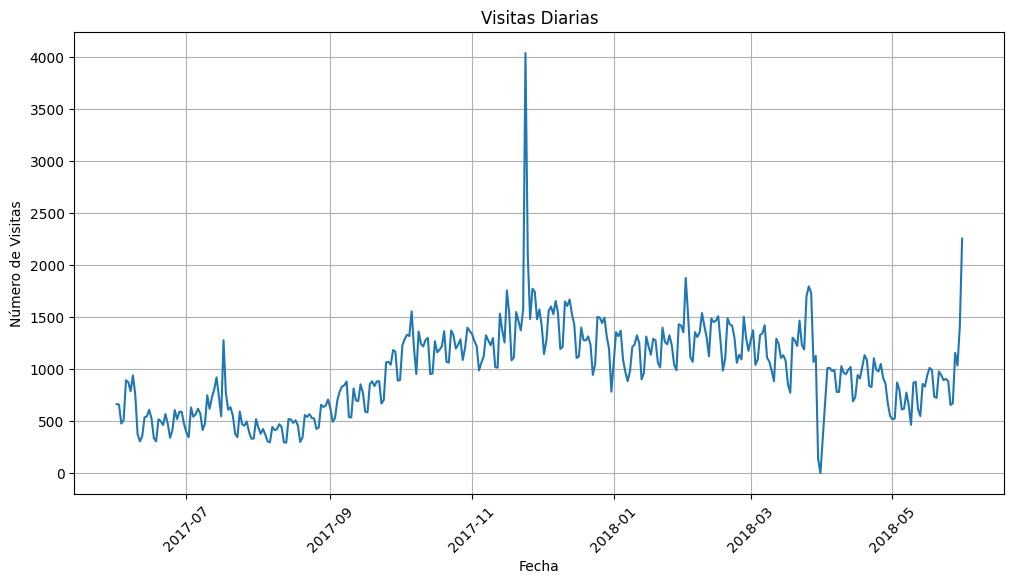

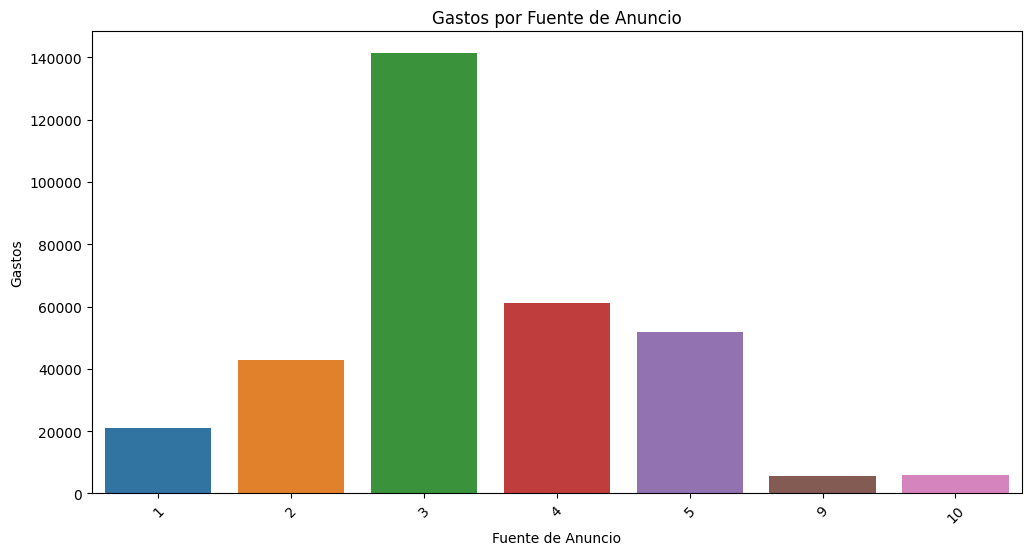

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de visitas diarias
plt.figure(figsize=(12, 6))
plt.plot(daily_visits.index, daily_visits.values)
plt.title('Visitas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Número de Visitas')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Gráfico de costos por fuente
plt.figure(figsize=(12, 6))
sns.barplot(x=costs_by_source.index, y=costs_by_source.values)
plt.title('Gastos por Fuente de Anuncio')
plt.xlabel('Fuente de Anuncio')
plt.ylabel('Gastos')
plt.xticks(rotation=45)
plt.show()


## Concluciones

Rendimiento de Visitas:


Durante el período analizado, el número de visitas mostró una tendencia creciente, con picos notables en ciertas fechas. Esto indica un interés sostenido en nuestros productos y servicios, lo que resalta la efectividad de algunas campañas de marketing.


Retención de Clientes:


La proporción de usuarios que regresan se situó alrededor del 63.5%, lo que sugiere una buena tasa de retención. Sin embargo, hay espacio para mejorar esta métrica mediante la implementación de estrategias de fidelización y atención al cliente.


Análisis de Ventas:


Se registraron 50,415 pedidos con un tamaño promedio de compra de aproximadamente 5.00 unidades. Estos resultados indican una actividad de compra saludable, pero también sugieren la necesidad de fomentar compras más grandes a través de promociones o bundling de productos.


Valor de Vida del Cliente (LTV):


El LTV calculado de 6.90 indica que cada cliente aporta un valor significativo a lo largo de su relación con la empresa. Este valor debe ser considerado en la planificación de presupuestos de marketing y adquisición de clientes.


Eficiencia en Marketing:


Los gastos totales en marketing fueron de 329,131.62, con un costo de adquisición de clientes (CAC) de 6.53. Aunque esto es relativamente aceptable, el ROMI de 0.06 sugiere que las inversiones en marketing no están generando un retorno óptimo. Es esencial revisar las campañas para identificar áreas de mejora y optimizar el uso del presupuesto.


Recomendaciones para Mejorar el Rendimiento:


Se deben realizar ajustes en las campañas de marketing que no generen resultados positivos y redirigir los recursos hacia aquellas que ofrezcan un mayor retorno.


La implementación de programas de fidelización y el análisis de cohortes permitirán entender mejor el comportamiento de los clientes y mejorar la experiencia general.


Además, es recomendable explorar estrategias que fomenten un mayor valor por cliente, como promociones de ventas cruzadas o la introducción de nuevas líneas de productos.